In [41]:
from _Ising import *
from _FigureJiazeHelper import *
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import networkx as nx
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=16)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['lines.markersize'] = 12

%config InlineBackend.figure_format = 'retina'

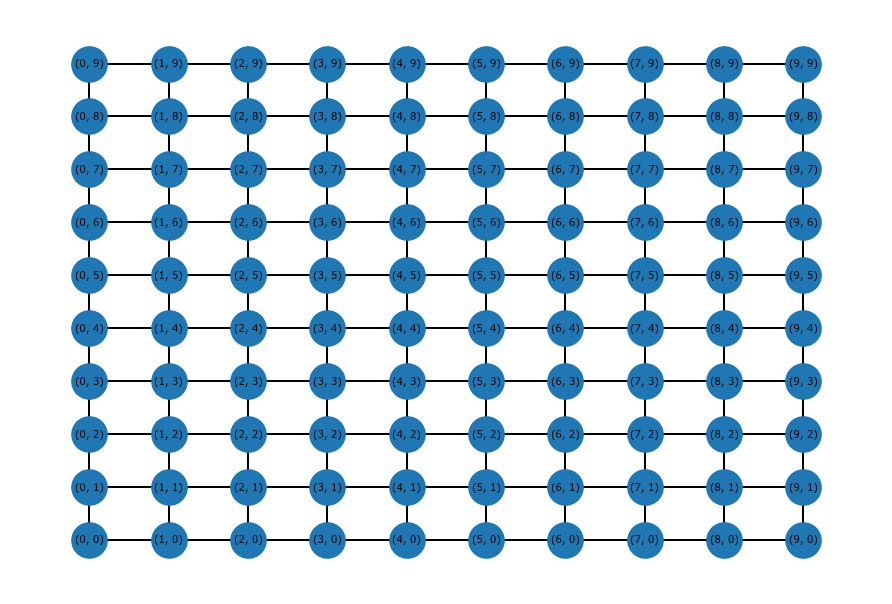

In [22]:
g = nx.grid_2d_graph(10, 10)
n = g.number_of_nodes()
pos = dict()
for node in g.nodes:
    pos[node] = np.array([node[0] / n, node[1] / n])
nx.draw(g, pos=pos, with_labels=True, font_size=5)
A = nx.to_numpy_array(g)
# print(pos)

 11%|████████▊                                                                      | 111/1000 [04:39<37:18,  2.52s/it]


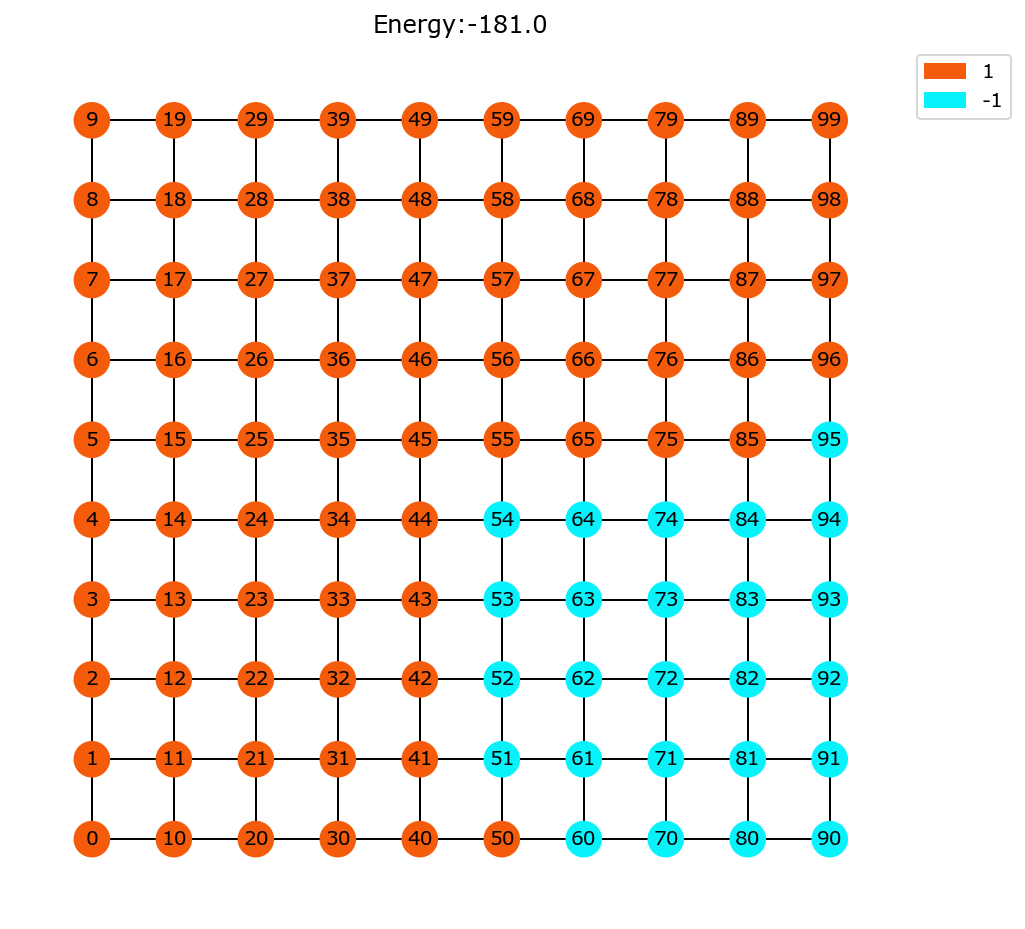

In [52]:
# Ising and its parameter
ising = Ising(A)
ising.init_s()
J = 1
H = 0.5
T = 1
# fit position
newpos = dict()
pos_list = list(pos.values())
for node in ising.g.nodes:
    newpos[node] = pos_list[node]
# fill color
red = '#F45C0B'
blue = '#08F2FC'
c = [red if i == 1 else blue for i in ising.s]
fig = plt.figure(figsize=(8, 8))
plt.title("Energy:" + str(ising.energy(J, H)))
nx.draw(ising.g, pos=newpos, with_labels=True, font_size=10, node_color=c)
red_patch = mpatches.Circle(xy=(0,0), radius=0, color=red, hatch='o', label='1')
blue_patch = mpatches.Circle(xy=(0,0), radius=0, color=blue, hatch='o', label='-1')
plt.gca().legend(loc=2, bbox_to_anchor=(1.0, 1.0), handles=[red_patch, blue_patch])
plt.savefig("./result/ising/Test0.png", dpi=600)

# iteration
for update_i in tqdm(range(1000)):
    no_update = 0
    jump = False
    while ising.iter(J, H, T) is False:
        no_update += 1
        if no_update > 50:
            jump = True
    if jump:
        break
    # fill color
    c = [red if i == 1 else blue for i in ising.s]
    plt.cla()
    plt.title("Energy:" + str(ising.energy(J, H)))
    nx.draw(ising.g, pos=newpos, with_labels=True, font_size=10, node_color=c)
    plt.gca().legend(loc=2, bbox_to_anchor=(1.0, 1.0), handles=[red_patch, blue_patch])
    plt.savefig("./result/ising/Test" + str(int(update_i+1)) + ".png", dpi=600)